# María José Fonseca Vázquez
## Análisis de Datos - Casa Semana 2
### Múltiples cadenas

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [3]:
modelo = lambda args: args[0]*x_ + args[1] 

def likelihood(args):
    lk = (y_-modelo([args[0], args[1]]))**2/(err_**2)
    return -.5*lk.sum()

In [4]:
#Puntos para ajustar:

m_ = 7
b_ = 5
lon = 20
x_ = np.linspace(0, 4, lon)
y_ = m_ * x_ + b_
err_ = []


for k in range(lon):
    y_[k] += np.random.normal(0, 0.3)
    err_.append(.2)
    
x_ = np.array([x_])
y_ = np.array([y_])
err_ = np.array([err_])    

In [13]:
likelihood([7, 5]) 

-25.163035863832334

In [11]:
likelihood([1, 8])

-33115.62596750305

In [54]:
def markov(m_0, b_0):
    pasos = 0
    sigma_m = .015
    sigma_b = .012
    m_old = m_0
    b_old = b_0
    
    pr = 1 #prior plano
    posterior = lambda m_new, b_new: likelihood([m_new, b_new])* pr
    porterior_0 = lambda m_old, b_old: likelihood([m_old, b_old])* pr
    
    NewValue = 0
    
    while pasos <= N:  
        m_new = np.random.normal(m_old, sigma_m)
        b_new = np.random.normal(b_old, sigma_b)
        
        if m_new >= m_-3 and m_new <= m_+3 and b_new >= b_-3 and b_new <= b_+3: 
            #check = likelihood([m_new, b_new])/likelihood([m_old, b_old])
            check = posterior(m_new, b_new)/posterior(m_old, b_old)
        
            if check < 1:
          
                m_arr[i].append(m_new)
                b_arr[i].append(b_new)
                NewValue += 1
                m_old, b_old = m_new, b_new
            #elif np.random.uniform(0, 1) < (likelihood([m_new, b_new])/likelihood([m_old, b_old])):  
            elif np.random.uniform(0, 1) > check:
                #print('Si2' + str(check))
                m_arr[i].append(m_new)
                b_arr[i].append(b_new)
                NewValue += 1
                #print(likelihood([m_new, b_new])/likelihood([m_old, b_old]))
                m_old, b_old = m_new, b_new
            else:
                m_arr[i].append(m_old)
                b_arr[i].append(b_old)
        else:
            m_arr[i].append(m_old)
            b_arr[i].append(b_old)
        pasos += 1
    
    FraccAcep.append(NewValue/N)
    values = [m_new, b_new]
    return values

Cadena 1: 
m: 7.066941014992251 b: 4.877279071980336
Fraccion de Aceptacion :0.457
Cadena 2: 
m: 7.015230350815019 b: 4.980994194215486
Fraccion de Aceptacion :0.179
Cadena 3: 
m: 7.001683222704006 b: 4.9754934753391575
Fraccion de Aceptacion :0.283
Cadena 4: 
m: 7.002831171877235 b: 4.969921681143901
Fraccion de Aceptacion :0.192
Cadena 5: 
m: 6.998909972678774 b: 4.954528380050845
Fraccion de Aceptacion :0.177


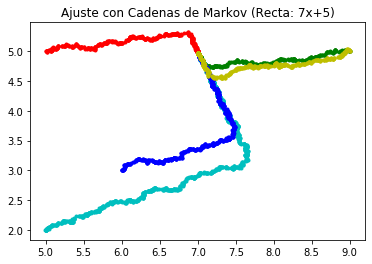

In [60]:
N = 1000
FraccAcep = []
m_arr = [[], [], [], [], []]
b_arr = [[], [], [], [], []]
res = [[], [], [], [], []]

m_in = []
b_in = []


random.seed(18)

for i in range(5):
    m_in.append(random.randint(m_-3, m_+3))
    b_in.append(random.randint(b_-3, b_+3))

#m_in = [-5, 11, 7, 10, 3]
#b_in = [3, 7, 8, 1, 3]
for i in range(5):
    m_arr[i].append(m_in[i])
    b_arr[i].append(b_in[i])

#print(m_arr, b_arr)

color = ['c.', 'g.', 'b.', 'r.', 'y.']
#Ciclo para ejecutar todas las cadenas:
for i in range(5):
    res[i] = markov(m_in[i], b_in[i])
    print('Cadena ' + str(i + 1) + ': ')
    plt.plot(m_arr[i], b_arr[i], color[i])
    plt.title('Ajuste con Cadenas de Markov (Recta: 7x+5)')
    print('m: ' + str(res[i][0]) + ' b: ' + str(res[i][1]))
    
    print('Fraccion de Aceptacion :' + str(FraccAcep[i]))
    #print(likelihood(res[i]))
#FraccAcep